### Analyysejä analysointiosaamisen tehtävään 2

In [1]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('https://taanila.fi/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Emerging Market Equity Select,0.057362,0.037210,-0.127854,-0.104560,0.0130,EQ_EMER_GLOBAL
1,Alexandria Kehittyvät Markkinat Osinko,0.038891,0.048642,-0.052433,-0.056391,0.0100,EQ_EMER_GLOBAL
2,"Danske Invest Global Emerging Markets, EUR",0.037449,0.061599,-0.121212,-0.086301,0.0192,EQ_EMER_GLOBAL
3,Danske Invest Kehitt. Osakemarkkinat,0.034706,0.033012,-0.102572,-0.066973,0.0050,EQ_EMER_GLOBAL
4,Danske Invest SICAV Global Emerging Markets Cl...,NaN,NaN,NaN,NaN,0.0163,EQ_EMER_GLOBAL


In [2]:
# Lyhyemmät nimet muuttujille
# df = df.drop(['Nro'], axis = 1)
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [3]:
df['rahastoluokka'].value_counts()

EQ_EUROPE         127
EQ_NORAM           79
EQ_EMER_GLOBAL     61
EQ_FINLAND         42
Name: rahastoluokka, dtype: int64

In [4]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       47.000000   94.000000   29.000000  60.000000
           mean         0.048130    0.062729    0.098612   0.110356
           std          0.029579    0.022595    0.024054   0.038933
           min         -0.025686    0.016534    0.062941   0.006679
           25%          0.036332    0.047992    0.085674   0.083913
           50%          0.050385    0.060669    0.094462   0.119317
           75%          0.071424    0.069587    0.107467   0.130575
           max          0.100181    0.119062    0.166849   0.199064
tuotto 3v  count       54.000000  103.000000   36.000000  63.000000
           mean         0.060967    0.089701    0.138950   0.154497
           std          0.043690    0.031723    0.051954   0.044178
           min         -0.049072    0.015886    0.091468   0.036337
           25%          0.045977    0.069242    0.099109   0.127875
           50%          0.059384    0.086705    0.117314   0.169466
           75%          0.086291    0.105066    0.155818   0.186233
           max          0.198311    0.189223    0.277455   0.228856
tuotto 1v  count       56.000000  119.000000   39.000000  74.000000
           mean        -0.062017    0.096283    0.027339   0.178748
           std          0.106003    0.072276    0.041141   0.084460
           min         -0.263462   -0.096212   -0.106129  -0.195382
           25%         -0.135906    0.058458    0.013690   0.169020
           50%         -0.057092    0.116855    0.036792   0.205593
           75%          0.008999    0.146190    0.047801   0.228230
           max          0.179166    0.280911    0.076825   0.309332
tuotto 6kk count       58.000000  120.000000   39.000000  77.000000
           mean        -0.093402   -0.070102   -0.156936  -0.007719
           std          0.090352    0.062470    0.029673   0.048863
           min         -0.392590   -0.230623   -0.221942  -0.177733
           25%         -0.145662   -0.101599   -0.173957  -0.019674
           50%         -0.078318   -0.056982   -0.150924   0.002224
           75%         -0.043814   -0.029693   -0.137943   0.015683
           max          0.101212    0.096687   -0.065060   0.135526
palkkio    count       61.000000  127.000000   42.000000  79.000000
           mean         0.014256    0.011655    0.011599   0.011634
           std          0.007019    0.005737    0.005926   0.006071
           min          0.000000    0.000000    0.001590   0.000000
           25%          0.008000    0.007500    0.006200   0.006250
           50%          0.015000    0.011600    0.012000   0.015000
           75%          0.019000    0.017400    0.016750   0.017750
           max          0.025000    0.020000    0.020000   0.020000

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 5v'>

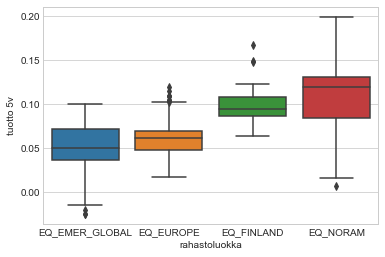

In [5]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 3v'>

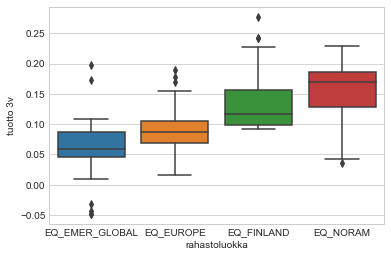

In [6]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 1v'>

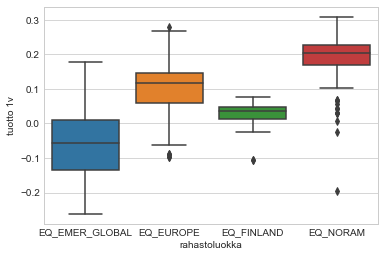

In [7]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 6kk'>

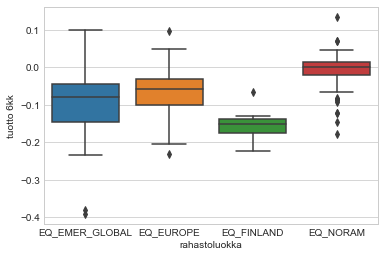

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='palkkio'>

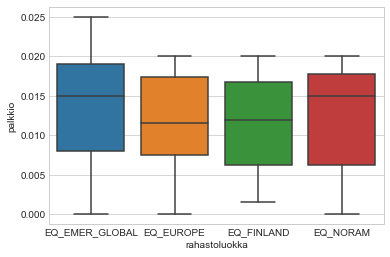

In [9]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [10]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.116612
               palkkio     0.116612  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.311735
               palkkio    -0.311735  1.000000
EQ_FINLAND     tuotto 1v   1.000000 -0.158157
               palkkio    -0.158157  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.374656
               palkkio    -0.374656  1.000000

In [11]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.4f' %p)

EQ_EMER_GLOBAL korrelaatio 0.117, p-arvo 0.3921
EQ_EUROPE korrelaatio -0.312, p-arvo 0.0006
EQ_FINLAND korrelaatio -0.158, p-arvo 0.3362
EQ_NORAM korrelaatio -0.375, p-arvo 0.0010


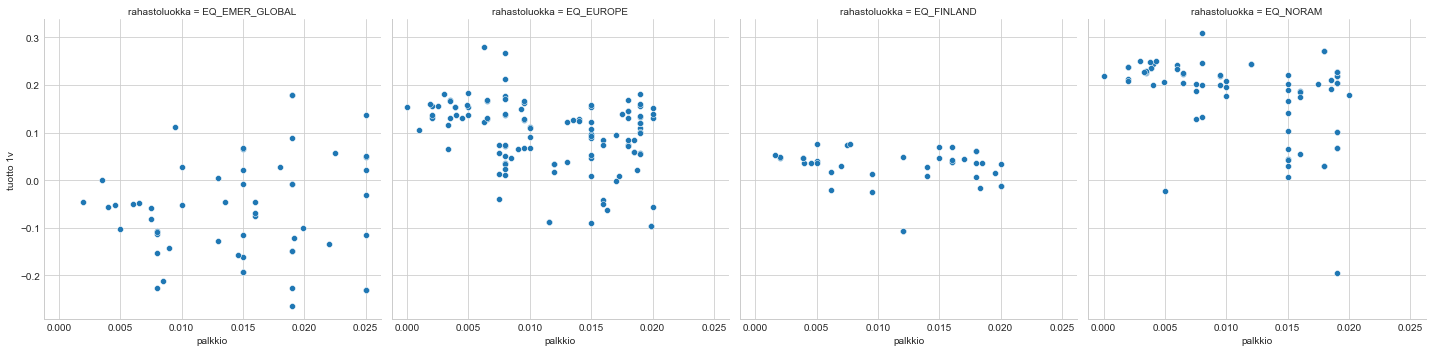

In [12]:
sns.relplot(x='palkkio', y='tuotto 1v', col='rahastoluokka', data=df, kind='scatter')